# Situation de proportionnalité
## Des points expérimentaux au graphique

Très souvent en TP, on mesure les valeurs d'une grandeur y en fonction de la valeur d'un paramètre x que l'on change d'une mesure à une autre. Un phénomène physique fait que y varie lorsque x change. Pour mieux étudier les variations de y, on réalise un graphique en plaçant les couples de valeurs (x,y) dans un repère. On obtient un *nuage de points expérimentaux*.

## Exemple simple

On pèse la masse d'un paquet de bonbons en faisant varier le nombre de bonbons dans le paquet (on néglige la masse de l'emballage et les bonbons sont tous identiques).

1. Dans cet exemple, identifiez la grandeur qui joue le rôle de x et celle qui joue le rôle de y.
2. On prépare 4 paquets de bonbons de tailles différentes.

| nb bonbons | 10 | 20 | 30 | 40  |
|------------|----|----|----|-----|
| masse en g | 30 | 60 | 90 | 120 |

3. Comment s'appelle la relation mathématique entre la masse et le nombre de bonbons ?
4. On note m la masse du paquet et n le nombre de bonbons. Propose une écriture mathématique exprimant la relation entre m et n.
5. On souhaite représenter graphiquement l'évolution de la masse du paquet en fonction du nombre de bonbons présents. Sur quel axe doit-on placer le nombre de bonbons ?
6. Sans faire le graphique, quelle est l'allure de cette représentation graphique ?

Nous allons réaliser un programme qui va produire ce graphique.


## Code Python élémentaire

- Dans une cellule python, recopie et exécute le programme suivant. 
- En exécutant le programme tu dois obtenir le graphique ci-dessous.

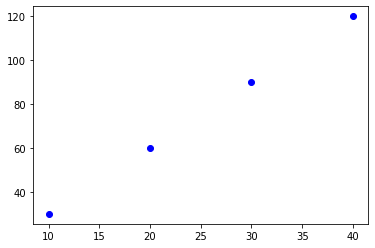

In [1]:
# importations de nouvelles instructions
import matplotlib.pyplot as plt
import numpy as np

# Données expérimentales
nb = [10, 20, 30, 40]
m = [30, 60, 90, 120]

# graphique
plt.plot(nb,m,"bo")

### Commentaires

1. Observez le graphique : est-il correct ?
2. Dans la dernier instruction `plt.plot` échanger la position des paramètres `nb` et `m`. Exécutez à nouveau. Que s'est-il passé ?
2. Quels renseignements importants manquent-ils sur ce graphique ?

Le code ci-dessous ajoute des informations au graphique.

3. Compléter le code de manière à avoir comme titre: "Représentation de la masse en fonction du nombre" 
4. Nommer correctement les axes.

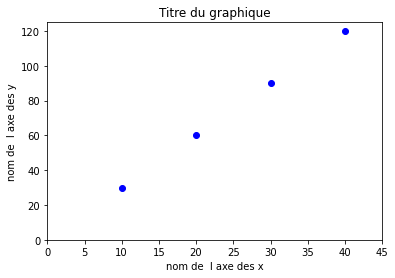

In [1]:
# importations de nouvelles instructions
import matplotlib.pyplot as plt
import numpy as np

# Données expérimentales
nb = [10, 20, 30, 40]
m = [30, 60, 90, 120]

# graphique mis en forme
#Légendes titres et axes
plt.title('Titre du graphique')
plt.xlabel('nom de  l axe des x')
plt.ylabel('nom de  l axe des y')
# Choix de l'échelle
plt.axis(xmin = 0, xmax = 45, ymin= 0, ymax = 125)
plt.plot(nb,m,"bo")

# Modélisation
## C'est quoi modéliser ?

A partir des points expérimentaux (x,y), on veut maintenant trouver une relation mathématique qui permet de prédire la valeur de y pour n'importe quelle valeur x sans faire d'expérience, simplement par calcul.

On a besoin d'une relation mathématique entre y et x. On choisit cette relation à partir du graphique. Lorsque les points expérimentaux sur le graphique sont distribués autour d'une droite qui passe par l'origine, on utilise une relation linaire: $$y=a\times x$$ c'est aussi l'équation d'une droite passant par l'origine de coefficient directeur $a$.

**Trouver la valeur de $a$ à partir du graphique permet d'obtenir le modèle.**

## Comment modéliser ?

Nous allons utiliser python pour calculer le coefficient $a$ de la droite qui passe au plus près de tous les points du graphique. Pour cela nous allons utiliser:

- des tableaux numpy  
- l'instruction `linregress`

### Utilisation des tableaux numpy

Ces tableaux de données permettent de faire automatiquement des calculs sur l'ensemble des valeurs du tableau.

Technique: 

On rentre les données sous la forme d'un `np.array`. L'exemple ci-dessous montre l'intérêt de ce type de tableau en le comparant à une simple liste de données.

In [4]:
# Liste de données Sans numpy 
x = [1,2,3]
print(3 * x) 
# Liste AVEC Numpy !
X = np.array([1, 2 ,3])
print('multiplions toutes les valeurs par 3')
print(3*X)

[1, 2, 3, 1, 2, 3, 1, 2, 3]
multiplions toutes les valeurs par 3
[3 6 9]


### Modélisation ou régression linéaire

Je répète : 

**A retenir** 

1. Lorsque les points du graphique sont alignés sur une droite qui passe par l'origine les grandeurs portées par les axes sont proportionnelles.

2. L'équation de cette droite est de la forme $$y=a\times x$$ avec $a$ le coefficient de proportionnalité est aussi le **coefficient directeur de la droite moyenne**. 

Le programme suivant permet de calculer $a$ à partir de la liste des données X et Y

In [2]:
# importation de linregress
from scipy.stats import linregress

# Valeurs à modéliser
X = np.array([1, 2 ,3]) # Attention syntaxe ([ ,  , ])
Y = np.array([ 2.81, 6.15 ,8.77])
print(linregress(X,Y)) # Affiche tous les calculs de modélisation 
a = linregress(X,Y)[0] #on récupère slope: la pente = coeff directeur
b = linregress(X,Y)[1] #on récupère intercept: l'ordonnée à l'origine


LinregressResult(slope=2.9799999999999995, intercept=-0.049999999999998934, rvalue=0.9975765156006898, pvalue=0.04433053604434066, stderr=0.20784609690826517, intercept_stderr=0.4489988864128728)


## Questions

1. Dans le programme ci-dessus X et Y sont elles strictement proportionnelles ?
2. A partir des résultats des calculs fait par Python, quelle est l'équation de la droite qui modélise la relation entre X et Y.
3. Calculer la valeur de Y prédit par le modèle lorsque X vaut 1,5 ?
4. Vérifier la valeur précédente, en utilisant le graphique ci-dessous.

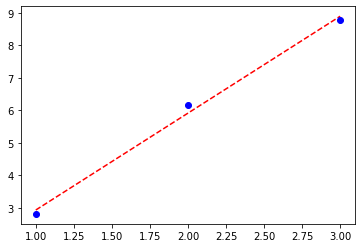

In [3]:
plt.plot(X,a*X + b,"r--")
plt.plot(X,Y,"bo")


### Quand la modélisation est-elle bonne ?

A partir des points expérimentaux, on calcule un nombre souvent noté $R^2$ qui s'appelle le coefficient de corrélation. 

**On retient que** si $R^2>0,9$ alors les points s'alignent bien suivant une droite et la modélisation est légitime. 

Dans le cas contraire, il faut vérifier si les mesures sont bien correctes et éventuellement changer de modèle. 

### Calcul de $R^2$ avec Python



In [7]:
R2 = linregress(X,Y)[2] #on récupère le coefficient de corrélation
print(f"Le coefficient de corrélation vaut {R2:<5.3f}")

Le coefficient de corrélation vaut 0.998


# Exercice 
## Situation

Des élèves de première, disposent de 5 solutions colorées de concentration C connues. Pour chaque solution, ils mesurent l'absorbance $A$ de la solution. 

La loi de Beer-Lambert annonce que l'absorbance et la concentration sont reliées par $$ A= k\times C$$ où k est une constante.

Voici leurs mesures:

| C en mol/L | 0,001 |  0,002| 0,003 | 0,004  |
|------------|----|----|----|-----|
|A | 0,28 | 0,55 | 0,90 | 1,30 |

## Votre travail

**Votre objectif** 

- Représenter dans un graphiques les mesures.
- Montrer que les mesures sont cohérentes avec la loi de Beer-Lambert
- En déduire la valeur de k
- Préciser les unités de k

**Outils**

- Saisir les valeurs dans des tableaux numpy
- Produire un graphique en modifiant les codes donnés plus haut
- Effectuer la modélisation à l'aide de `linregress`
- Valider la modélisation en calculant $R^2$